In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [2]:
# Params (Sun - Jupiter)
R = 627938 # in km
rP = 69911 # in km
a = 778000000000 # in km
P = 12.0*365*24 # in hours
w = 1.5*np.pi
K = 6.2
e = 0.03
# Stellar angular velocity has to be assumed
rot = 100/R
# The sky-projected spin-orbit angle has to be assumed
angle = 10*np.pi/180

In [3]:
# Calculate E using Newton-Raphson
def func_E(E, M, e):
    return E - e*np.sin(E) - M
def der_func_E(E, M, e):
    return 1 - e*np.cos(E)
def second_der_func_E(E, M, e):
    return e*np.sin(E)

#for the radial velocity curve
t = np.linspace(-P/2, P/2, 500)
M = 2*np.pi*t/P
E = newton(func=func_E, x0=np.zeros(M.size), fprime=der_func_E, args = (M, e), fprime2=second_der_func_E)
v = np.arccos((np.cos(E) - e)/(1 - e*np.cos(E)))
#v0 is taken to be 0
vel = K*(np.cos((w + np.pi) + (v + np.pi)) + e*np.cos(w + np.pi))
vel_2 = np.zeros(vel.size)
vel_2[ : int(vel.size/2)] = vel[ : int(vel.size/2)]
vel_2[int(vel.size/2) : ] = -vel[int(vel.size/2) : ] + 2*K*e*np.cos(w + np.pi)

In [4]:
# Rossiter-McLaughlin effect
tT = P*np.arcsin(R*(1 + rP/R)/a)/np.pi
tF = np.arcsin(np.sin(tT*np.pi/P)*(1 - rP/R)/(1 + rP/R))*P/np.pi
d = rP**2/R**2
B = np.sqrt(((1 - d**0.5)**2 - (tF/tT)**2*(1 + d**0.5)**2)/(1 - (tF/tT)**2))
factor = np.sqrt(1 - e**2)/(1 + e*np.sin(w))
tt = tT*factor
tf = tF*factor
b = B*(1 - e**2)/(1 + e*np.sin(w))
D = np.sqrt(R**2 - b**2)

In [5]:
# Ingress (between 1st and 2nd touch)
t1 = np.linspace(-tt/2, -tf/2, 500)
M1 = -2*np.pi*t1/P
E1 = newton(func=func_E, x0=np.zeros(M1.size), fprime=der_func_E, args = (M1, e), fprime2=second_der_func_E)
v1 = np.arccos((np.cos(E1) - e)/(1 - e*np.cos(E1)))
R1 = a*(1 - e**2)/(1 + e*np.cos(v1))
x1 = R1*np.cos(2*np.pi - w - v1)
y1 = x1 - D

# Calculate area covered
arg1 = y1/rP
arg1_2 = np.zeros(arg1.size)
arg1_2[np.where(abs(arg1) < 1)] = arg1[np.where(abs(arg1) < 1)]
for i in range(arg1.size):
    if abs(arg1[i]) >= 1:
        arg1_2[i] = int(arg1[i])
first_1 = rP**2*np.arccos(arg1_2)
second_1 = rP**2*arg1_2*np.sqrt(1 - arg1_2**2)
area1 = first_1 - second_1

# Calculate observed change in radial velocity
r1 = (D - rP)*np.cos(angle) - b*np.sin(angle)
h1 = (D - rP)*np.sin(angle) + b*np.cos(angle)
theta1 = np.arccos(h1/R)
sin_phi_1 = r1/(R*np.sin(theta1))
rm1 = rot*np.sin(theta1)*sin_phi_1*area1/(np.pi*R)
vel1 = K*np.cos((w + np.pi) + (v1 + np.pi)) + K*e*np.cos(w + np.pi)
var1 = vel1 + rm1

In [6]:
# complete overlap (between 2nd and 3rd touch)
lim = P*np.arcsin(b*np.tan(angle)/a)/(2*np.pi)

# Blue Part
t2 = np.linspace(-tf/2, lim, 500)
M2 = 2*np.pi*t2/P
E2 = newton(func=func_E, x0=np.zeros(M2.size), fprime=der_func_E, args = (M2, e), fprime2=second_der_func_E)
v2 = np.arccos((np.cos(E2) - e)/(1 - e*np.cos(E2)))
R2 = a*(1 - e**2)/(1 + e*np.cos(v2))
x2 = R2*np.cos(2*np.pi - w - v2)
r2 = x2*np.cos(angle) - b*np.sin(angle)
h2 = x2*np.sin(angle) + b*np.cos(angle)
theta2 = np.arccos(h2/R)
sin_phi_2 = r2/(R*np.sin(theta2))
rm2 = rP**2*rot*np.sin(theta2)*sin_phi_2/R
vel2 = K*np.cos((w + np.pi) + (v2 + np.pi)) + K*e*np.cos(w + np.pi)
var2 = vel2 + rm2

# Red Part
t3 = np.linspace(lim, tf/2, 500)
M3 = 2*np.pi*t3/P
E3 = newton(func=func_E, x0=np.zeros(M3.size), fprime=der_func_E, args = (M3, e), fprime2=second_der_func_E)
v3 = np.arccos((np.cos(E3) - e)/(1 - e*np.cos(E3)))
R3 = a*(1 - e**2)/(1 + e*np.cos(v3))
x3 = R3*np.cos(2*np.pi - w - v3)
r3 = x3*np.cos(angle) - b*np.sin(angle)
h3 = x3*np.sin(angle) + b*np.cos(angle)
theta3 = np.arccos(h3/R)
sin_phi_3 = r3/(R*np.sin(theta3))
rm3 = -rP**2*rot*np.sin(theta3)*sin_phi_3/R
vel3 = -K*np.cos((w + np.pi) + (v3 + np.pi)) + K*e*np.cos(w + np.pi)
var3 = vel3 + rm3

In [7]:
# Egress (between 3rd and 4th touch)
t4 = np.linspace(tf/2, tt/2, 500)
M4 = 2*np.pi*t4/P
E4 = newton(func=func_E, x0=np.zeros(M4.size), fprime=der_func_E, args = (M4, e), fprime2=second_der_func_E)
v4 = np.arccos((np.cos(E4) - e)/(1 - e*np.cos(E4)))
R4 = a*(1 - e**2)/(1 + e*np.cos(v4))
x4 = R4*np.cos(2*np.pi - w - v4)
y4 = D - x4

# Calculate area covered
arg4 = y4/rP
arg4_2 = np.zeros(arg4.size)
arg4_2[np.where(abs(arg4) < 1)] = arg4[np.where(abs(arg4) < 1)]
for i in range(arg4.size):
    if abs(arg4[i]) >= 1:
        arg4_2[i] = int(arg4[i])
first_4 = rP**2*np.arccos(arg4_2)
second_4 = rP**2*arg4_2*np.sqrt(1 - arg4_2**2)
area4 = -first_4 + second_4 + np.pi*rP**2

# Calculate observed change in radial velocity
r4 = (D - rP)*np.cos(angle) - b*np.sin(angle)
h4 = (D - rP)*np.sin(angle) + b*np.cos(angle)
theta4 = np.arccos(h4/R)
sin_phi_4 = r1/(R*np.sin(theta4))
rm4 = -rot*np.sin(theta4)*sin_phi_4*area4/(np.pi*R)
vel4 = -K*np.cos((w + np.pi) + (v4 + np.pi)) + K*np.cos(w + np.pi)*e
var4 = vel4 + rm4

Text(0, 0.5, 'Radial velocity in m/s')

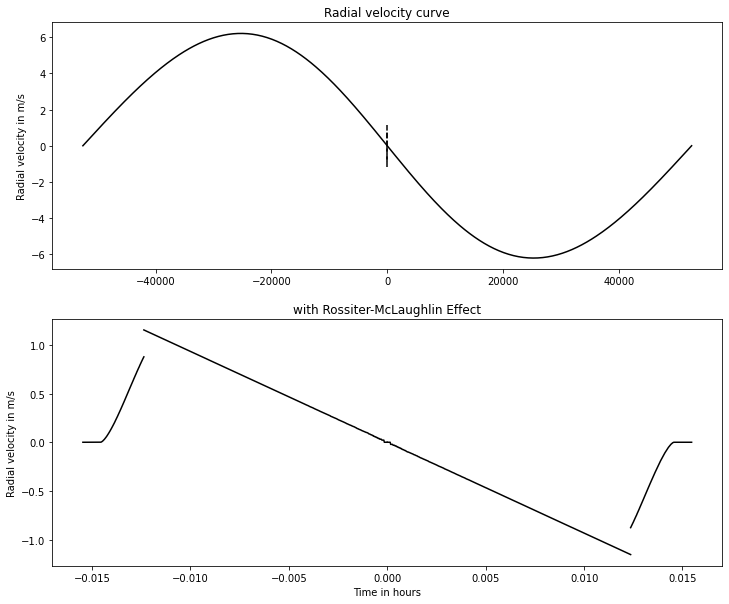

In [8]:
fig = plt.figure(figsize = (12, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


ax1.plot(t, vel_2, 'k')
ax1.plot(t1, var1, 'k--')
ax1.plot(t2, var2, 'k--')
ax1.plot(t3, var3, 'k--')
ax1.plot(t4, var4, 'k--')
ax1.set_title("Radial velocity curve")
ax1.set_ylabel("Radial velocity in m/s")

ax2.plot(t1, var1, 'k')
ax2.plot(t2, var2, 'k')
ax2.plot(t3, var3, 'k')
ax2.plot(t4, var4, 'k')
ax2.set_title("with Rossiter-McLaughlin Effect")
ax2.set_xlabel("Time in hours")
ax2.set_ylabel("Radial velocity in m/s")
